# Real Estate Price Predictor

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284411,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705595,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


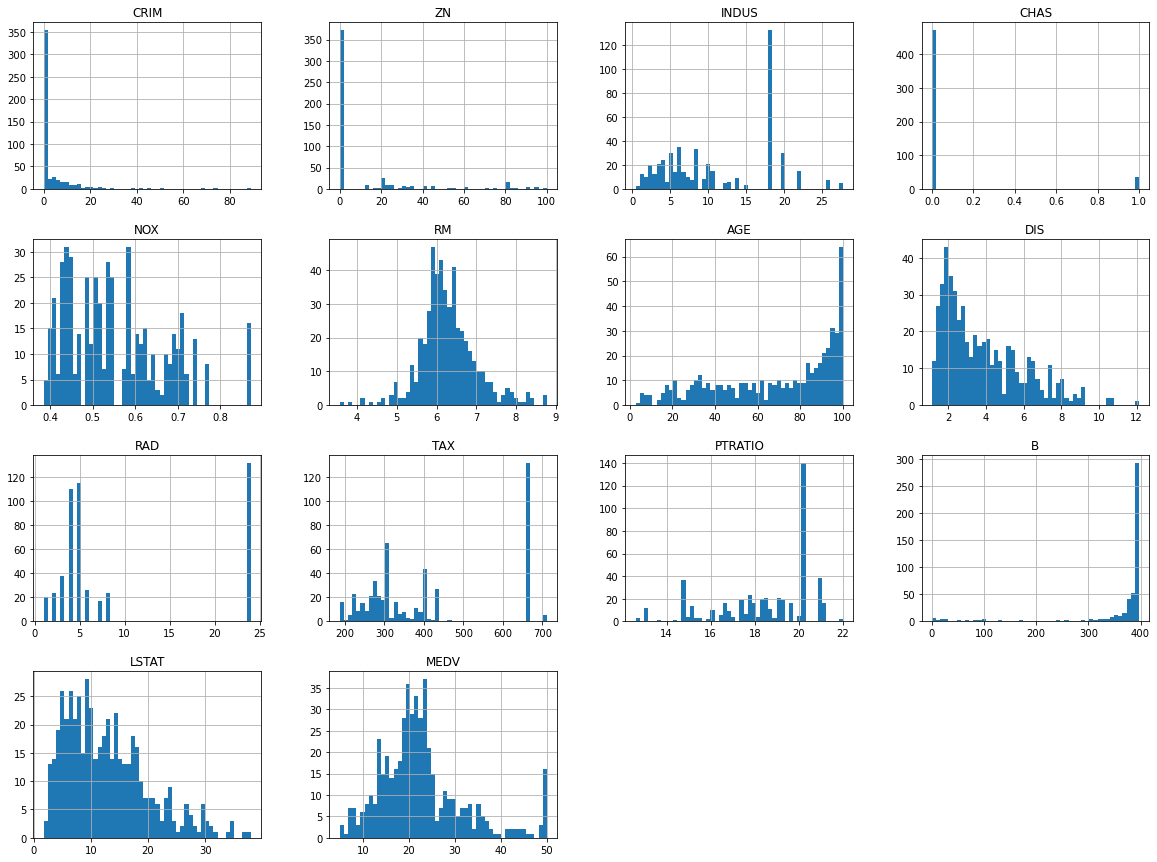

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

## Train-Test Splitting

In [8]:
# How train test spliting actually Work in Sciket Learn (For LEARNING ONLY)
#import numpy as np
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     #print(shuffled)
#     test_set_size=int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

# In long run normal mehod will become less effective because 
# model will see all data points at some point because we are using shuffilng.
# thats why we use random.seed() because it fix data points shuffled such that training & testing remain unique.
# 42 is usually everwhere but we can use any no.
# train_set,test_set=split_train_test(housing,0.2) #0.2 is ratio in which we are dividing the dataset

In [9]:
# Spliting dataset using Sklearn
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [10]:
print(f"No. of Training samples Used : {len(train_set)} \nNo. of Testing samples Used  : {len(test_set)}")

No. of Training samples Used : 404 
No. of Testing samples Used  : 102


In [11]:
# Now it is possible for some features like CHAS here, that testing set include all value some case(1 here) while training set 
# contain none of them. In this way model get confused. So to avoid this situation, We use StratifiedShuffleSplit function.

from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [12]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
housing=strat_train_set.copy()

## Looking for CoRelations

In [15]:
# Dataset collected may have wrong values which known as outliers to identify & deal with them we use Co-Relations
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
# 1 or close to 1 represrtaion strong relation while close to -1 represent weak relation.

MEDV       1.000000
RM         0.680866
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

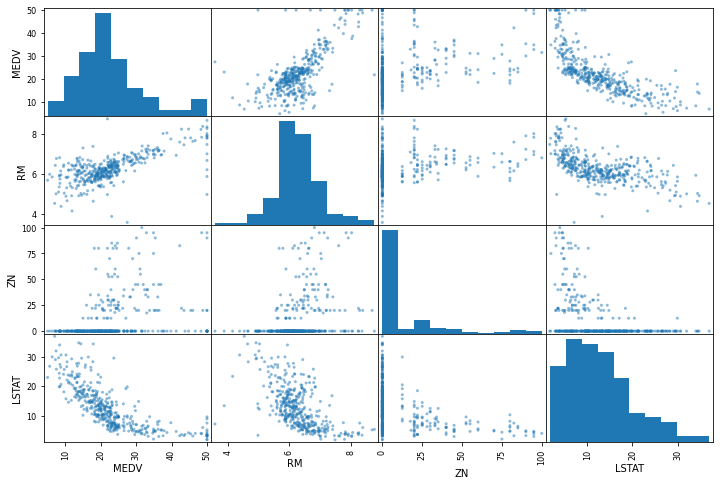

In [16]:
from pandas.plotting import scatter_matrix
# Now we choose those attributes whose attributes are either strongly corelated either in +ve or -ve way.
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

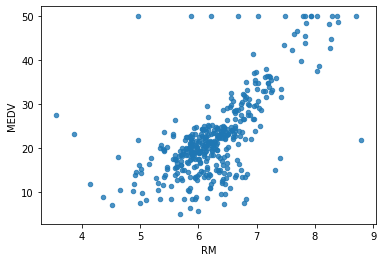

In [17]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)
plt.show()

## Trying out Attribute Combinations

In [18]:
housing['TAXRM']=housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [19]:
corr_metrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680866
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

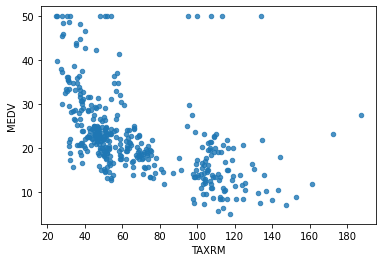

In [20]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)
plt.show()

In [21]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

## Handling Missing Values

In [22]:
# There are 3 Ways to handle Missing Values
# 1. Get Rid Of Missing Data Points
# 2. Get Rid of whole Attribute
# 3. Set values to (median, mode , mean or 0) as per requirement

In [23]:
#a=housing.dropna(subset=["RM"])             #Option 1
#a.shape

In [24]:
# housing.drop("RM",axis=1)   #Option 2

In [25]:
housing.describe() #Before We started filling values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279110,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715954,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [26]:
median=housing["RM"].median() #Option 3
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [27]:
housing.shape

(404, 13)

In [28]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [30]:
X=imputer.transform(housing)

In [31]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [32]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278416,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712426,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Sciket Learn Design

In [33]:
# Primary there are 3 types of people:

# 1. Estimators    : It estimates some parameters based on datasets. eg. SIMPLEIMPUTER. 
                #    Fit Method    : Fits the dataset & calculate internal parameter.

# 2. Transformers  : Transform Method takes input & return output based on learning from fit(). It also has convience function 
                # called fit_transform() which fits & then transforms.

# 3. Predictor     : LinearRegression model is example of predictor. Fit() & predict() are two common function. It also give 
                    # score() function which will evaluate the predictions.

        

# Feature Scaling

Primarily It is considuted of 2 types :
    
    1. Min-Max Scaling : It is known as normalization. Sklearn provide MinMaxScaler class for this.
                       = (value-min)/(max-min)
                       
    2. Standardization : Sklean provides StandardScaler class for this.
                       = (value-mean)/std

# Creating Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline=Pipeline([
        ('imputer',SimpleImputer(strategy="median")),
        # ........................... add as many codelines as you want
        ('std_scaler',StandardScaler()),
])

In [35]:
housing_num_tr=my_pipeline.fit_transform(housing_tr)
housing_num_tr.shape

(404, 13)

# Selecting Desired Model for Predictions

In [36]:
# In this Phase We will choose a model numerous models & check which one fits well

from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(housing_num_tr,housing_labels)

from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(housing_num_tr,housing_labels)

from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [37]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=my_pipeline.transform(some_data)
model1.predict(prepared_data)
model2.predict(prepared_data)
model3.predict(prepared_data)

array([22.369, 25.194, 16.647, 23.385, 23.448])

In [38]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating The Matrix

In [39]:
from sklearn.metrics import mean_squared_error
import numpy as np

# for linear regresser
housing_predictions=model1.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)

# For Decision Tree Regressor
housing_predictions=model2.predict(housing_num_tr)
dt_mse=mean_squared_error(housing_labels,housing_predictions)
dt_rmse=np.sqrt(dt_mse)
print(dt_rmse)

# For Random Forest Regressor
housing_predictions=model3.predict(housing_num_tr)
rf_mse=mean_squared_error(housing_labels,housing_predictions)
rf_rmse=np.sqrt(rf_mse)
print(rf_rmse)


4.832395646601198
0.0
1.2149837702130781


# Using Better Evaluation Technique (Cross-Validation)

In cross validation training dataset is further divided into sub-parts. One part is done for training & other is used for testing. Basically we training dataset into further test & train set.

In [40]:
from sklearn.model_selection import cross_val_score

# For Linear Regressor
scores1=cross_val_score(model1,housing_num_tr,housing_labels,scoring="neg_mean_squared_error")
rmse_scores1=np.sqrt(-scores1)

# For Decision Tree Regressor
scores2=cross_val_score(model2,housing_num_tr,housing_labels,scoring="neg_mean_squared_error")
rmse_scores2=np.sqrt(-scores2)

# For Random Forset Regressor
scores3=cross_val_score(model3,housing_num_tr,housing_labels,scoring="neg_mean_squared_error")
rmse_scores3=np.sqrt(-scores3)


In [41]:
print(rmse_scores1)
print(rmse_scores2)
print(rmse_scores3)

[4.21219048 4.48908463 4.97568046 6.34088452 5.27553995]
[5.07905406 4.29229859 5.36080886 5.56288406 3.27037842]
[2.9067164  3.59496526 3.09021668 4.04473334 3.09112898]


In [42]:
def print_scores(score):
    print(f"Score              : {score}")
    print(f"Mean               : {score.mean()}")
    print(f"Standard Deviation : {score.std()}")

In [43]:
print("Linear Regression Model Results")
print(print_scores(rmse_scores1))
print()
print("Decision Regression Model Results")
print(print_scores(rmse_scores2))
print()
print("Random Forest Regression Model Results")
print(print_scores(rmse_scores3))
print()

Linear Regression Model Results
Score              : [4.21219048 4.48908463 4.97568046 6.34088452 5.27553995]
Mean               : 5.058676008476214
Standard Deviation : 0.740128228576836
None

Decision Regression Model Results
Score              : [5.07905406 4.29229859 5.36080886 5.56288406 3.27037842]
Mean               : 4.713084795215659
Standard Deviation : 0.8407260513115297
None

Random Forest Regression Model Results
Score              : [2.9067164  3.59496526 3.09021668 4.04473334 3.09112898]
Mean               : 3.345552130740051
Standard Deviation : 0.4179869372339732
None



From results of above all models Random Forest Regressor Has Lowest Error Rates. Therefore It will be selected for further predictions.

# Saving The Model

In [44]:
from joblib import dump,load
dump(model3,'FinalPredictor.joblib')

['FinalPredictor.joblib']

In [46]:
print(prepared_data[0])

[-0.43942006  3.12628155 -1.12165014 -0.27288841 -1.42262747 -0.23950154
 -1.31238772  2.61111401 -1.0016859  -0.5778192  -0.97491834  0.41164221
 -0.86091034]
